Département de génie électrique - Polytechnique Montréal

Analyse des signaux - ELE2700

TP3 version 4.0: A2025

---

Numéro d'équipe: #102

Noms, prénoms et matricules:

Machraoui, Simon : 2487824

Beaumier, Édouard : 2087482


>⚠ **Attention:**
>
> Avant de commencer à modifier le notebook, assurez-vous de le sauvegarder dans votre *Google Drive* personnel.
>

#$\color{#18a2f2}{\textbf{TP3 - Réponse fréquentielle et chirp}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

**Objectif : Dans le contexte des télécommunications, comprendre comment et pourquoi les signaux *chirp* et les transformées de Fourier sont utilisés pour l'identification des systèmes.**

# <font color='green'> Introduction à l'Analyse Fréquentielle, la Transformée de Fourier et les Signaux *chirp* </font>
L'analyse fréquentielle est une approche fondamentale en traitement de signaux et en télécommunications. Elle offre une perspective différente de l'analyse temporelle en mettant l'accent sur les composantes fréquentielles d'un signal. Cette transformation de la représentation temporelle vers une représentation fréquentielle ouvre la porte à une multitude d'applications et de compréhensions approfondies des phénomènes physiques.

# <font color='green'> La Transformée de Fourier </font>
La transformée de Fourier (TF) est un outil mathématique clé qui permet de passer d'une représentation temporelle d'un signal à sa représentation fréquentielle. Elle décompose un signal en ses fréquences constitutives, permettant ainsi d'identifier les fréquences dominantes, d'analyser la phase et l'amplitude des composantes fréquentielles, et de concevoir des systèmes pour filtrer ou moduler des fréquences spécifiques. La TF est un élément fondamental de l'analyse des systèmes en télécommunication, car elle aide à comprendre comment les systèmes affectent les signaux en fonction de leur contenu fréquentiel.

# <font color='green'> Les Signaux *chirp* </font>
Un signal *chirp* est un signal dont la fréquence augmente ou diminue avec le temps. Il est souvent utilisé dans les applications de radar, de sonar, et dans les tests de systèmes pour sa capacité à couvrir une large gamme de fréquences en un court laps de temps. Cette propriété est essentielle pour caractériser des systèmes dont la réponse peut varier avec la fréquence. Lorsqu'un *chirp* est envoyé à travers un système et que sa sortie est analysée, il est possible d'obtenir une image claire de la manière dont le système répond à une large gamme de fréquences. Cela en fait un outil puissant pour l'identification des systèmes.

Pour plus d'information: https://en.wikipedia.org/wiki/Chirp

En se familiarisant avec ces concepts, vous serez mieux équipé pour comprendre comment et pourquoi les signaux *chirp* et les transformées de Fourier sont utilisés pour l'identification des systèmes, ainsi que pour résoudre des problèmes pratiques et théoriques en télécommunications.

## $\color{#03fc9d}{\textbf{Exercice 0, à faire en préparation:}}$

**Objectif : Dans cette section, vous allez explorer le concept des signaux *chirp* et étudier la réponse en fréquence des filtres en télécommunications.**

# <font color='green'>Introduction aux signaux *chirp* </font>

Considérer le *chirp* linéaire défini temporellement comme suit:

$$
x(t) = \text{cos}(\omega_0 t + \pi kt^2),
$$
où $\omega_0$ est la fréquence angulaire initiale et $k$ est le taux de variation de la fréquence.

$\color{orange}{\text{a) [code]}}$ Utiliser `numpy` pour générer un signal *up-chirp* linéaire sur une plage de fréquences de 20 Hz à 3 kHz, sur 0.05s, avec une fréquence d'échantillonnage de 100kHz. Générer ensuite un signal *down-chirp* linéaire ayant les mêmes paramètres que le signal *up-chirp*. Tracer les signaux dans le domaine temporel avec `matplotlib`.

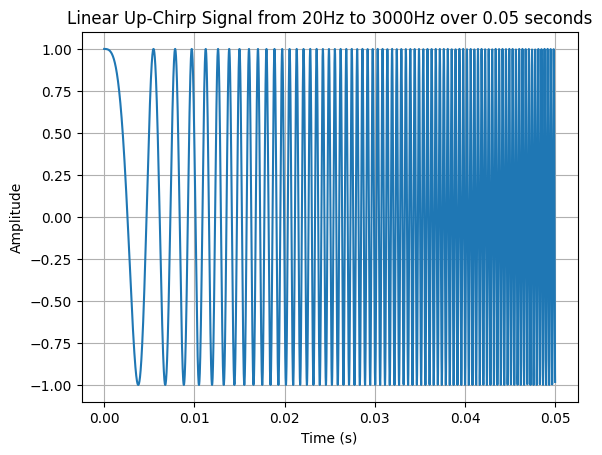

In [2]:
# @title
# Paramètres
f_start = 20
f_end = 3000
T = 0.05
fs = 10**5  # Échantillonnage de 100 kHz
# Array temporel
#t = np.linspace(0, T, int(T*fs))
t = np.arange(0,T,1/fs)
# Phase
phi_t = 2 * np.pi * f_start * t + np.pi * (f_end - f_start) * t**2 / T
# Chirp
up_chirp = np.cos(phi_t)


plt.plot(t, up_chirp)
plt.title(f"Linear Up-Chirp Signal from {f_start}Hz to {f_end}Hz over {T} seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

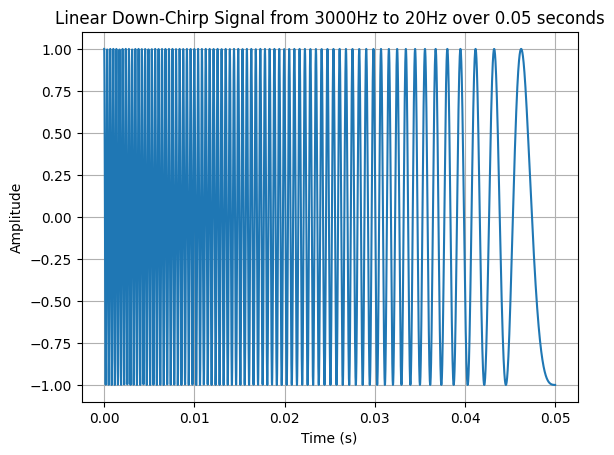

In [3]:
# @title
# Paramètres
f_start = 3000
f_end = 20
T = 0.05
fs = 10**5  # Échantillonnage de 100 kHz
# Array temporel
#t = np.linspace(0, T, int(T*fs))
t = np.arange(0,T,1/fs)
# Phase
phi_t = 2 * np.pi * f_start * t + np.pi * (f_end - f_start) * t**2 / T
# Chirp
down_chirp = np.cos(phi_t)


plt.plot(t, down_chirp)
plt.title(f"Linear Down-Chirp Signal from {f_start}Hz to {f_end}Hz over {T} seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Considérer ensuite le *chirp* exponentiel défini temporellement comme suit:

$$
x(t) = \text{cos}\left(\omega_0\left(\frac{T(k^{t/T}-1)}{\ln(k)}\right)\right),
$$
où $\omega_0$ est la fréquence angulaire initiale et $k = \frac{f_{t=T}}{f_{t=0}}$ est le taux de variation de la fréquence.

$\color{orange}{\text{b) [code]}}$ Utiliser `numpy` pour générer un signal *chirp* exponentiel sur une plage de fréquences de 200 Hz à 20 kHz, sur 0.05s, avec une fréquence d'échantillonnage de 100kHz. Tracer les signaux dans le domaine temporel avec `matplotlib`.

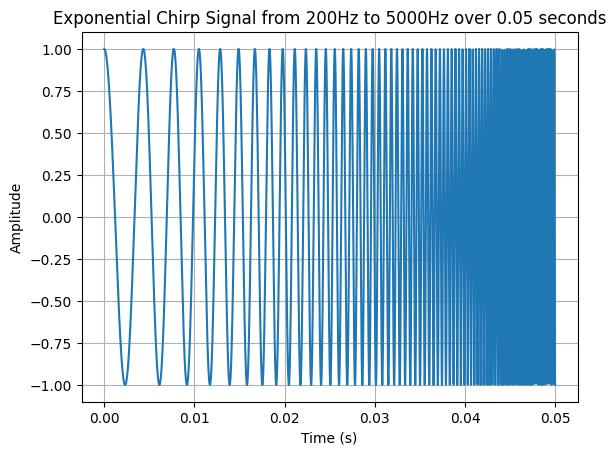

In [4]:
# @title
# Paramètres
f_start = 200
f_end = 5000 # 20 000 ? 
T = 0.05
fs = 10**5  # Échantillonnage de 100 kHz
# Array temporel
#t = np.linspace(0, T, int(T*fs))
t_exp = np.arange(0,T,1/fs)
#
k = f_end/f_start
phi_t = 2 * np.pi * f_start * (T*(k**(t_exp/T)-1))/np.log(k)
# Chirp
exp_chirp = np.cos(phi_t)


plt.plot(t_exp, exp_chirp)
plt.title(f"Exponential Chirp Signal from {f_start}Hz to {f_end}Hz over {T} seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

$\color{orange}{\text{c) [code]}}$ Générer, à l'aide de `numpy`, un sinus simple à une fréquence de 1 kHz. Tracer ce signal avec `matplotlib`. Il sera utilisé plus tard dans le TP.

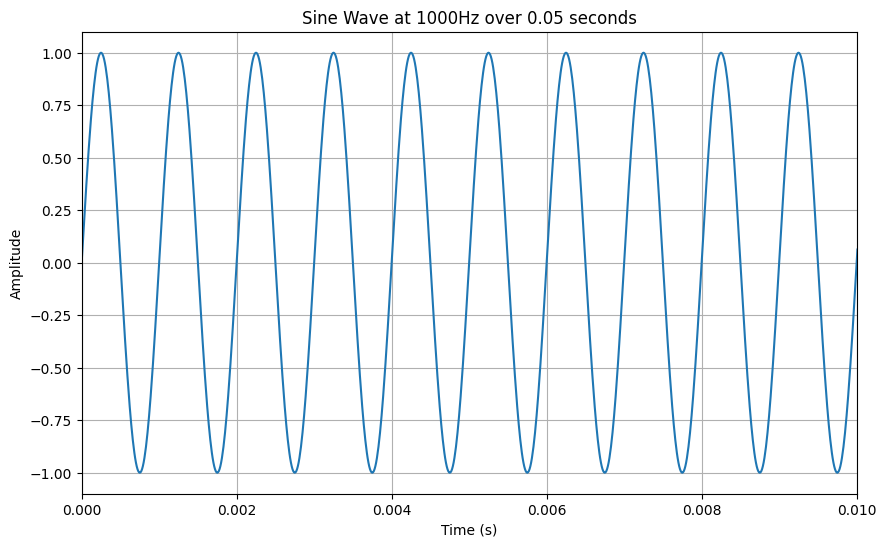

In [5]:
# @title
# Sine
f = 1000  # 1 kHz
sine = np.sin(2 * np.pi * f * t)

# Plot
plt.figure(figsize=(10,6))
plt.plot(t, sine)
plt.title(f"Sine Wave at {f}Hz over {T} seconds")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, 0.01)
plt.show()


# <font color='green'> Analyse et visualisation de la réponse en fréquence </font>

L'analyse fréquentielle est fondamentale pour comprendre l'impact d'un système (ou d'un filtre) sur un signal. Dans cette section, vous allez utiliser des outils de programmation pour explorer la réponse en fréquence de certains filtres typiques.

**Objectif** : En utilisant les bibliothèques `sympy`, `numpy` et `matplotlib`, déterminer et représenter graphiquement la réponse en fréquence des filtres suivants :



1.   Filtre passe-bas d'ordre 1:
$$ H_1(j\omega) = \frac{1}{1 + \frac{j\omega}{\omega_c}}. $$
2.   Filtre passe-haut d'ordre 2:
$$ H_2(j\omega) = \frac{\omega^2}{\omega^2 - j\sqrt{2}\omega\omega_c + \omega_c^2}. $$

Plus précisément:



$\color{orange}{\text{d) [code]}}$ Pour chaque filtre, en utilisant `sympy`, obtenir une expression analytique de la magnitude et de la phase de la réponse en fréquence.

In [6]:
# @title
omega, omega_c = sp.symbols('omega omega_c', real=True, positive=True)
j = sp.I

# Passe-bas
H1 = 1 / (1 + j*omega/omega_c)
magnitude_H1 = sp.Abs(H1)
phase_H1 = sp.arg(H1)

# Passe-haut
H2 = omega**2 / (omega**2 - j*sp.sqrt(2)*omega*omega_c + omega_c**2)
magnitude_H2 = sp.Abs(H2)
phase_H2 = sp.arg(H2)


print("Passe-bas d'ordre 1 (H1):")
print("Magnitude:")
display(magnitude_H1)
print("Phase:")
display(phase_H1)

print("\nPasse-haut d'ordre 2 (H2):")
print("Magnitude:")
display(magnitude_H2)
print("Phase:")
display(phase_H2)


Passe-bas d'ordre 1 (H1):
Magnitude:


sqrt(-1/(-omega**2/omega_c**2 - 1))

Phase:


arg(1/(I*omega/omega_c + 1))


Passe-haut d'ordre 2 (H2):
Magnitude:


omega**2/sqrt(omega**4 + 4*omega**2*omega_c**2 + omega_c**4)

Phase:


arg(1/(omega**2 - sqrt(2)*I*omega*omega_c + omega_c**2))

$\color{orange}{\text{e) [code]}}$ Pour chaque filtre, en utilisant `numpy`, évaluer ces expressions sur une plage de fréquences appropriée.

In [7]:
# @title
# Paramètres
omega_c = 2 * np.pi * 1000  # Fréquence de coupure
frequencies = np.linspace(0.1, 10000, 500)  # plage de fréquences de 0.1 Hz à 10 kHz
omega = 2 * np.pi * frequencies

# Réponse en fréquence passe-bas
H1 = 1 / (1 + 1j * omega / omega_c)
magnitude_H1 = np.abs(H1)
phase_H1 = np.angle(H1)

# Réponse en fréquence passe-haut
H2 = omega**2 / (omega**2 - 1j * np.sqrt(2) * omega * omega_c + omega_c**2)
magnitude_H2 = np.abs(H2)
phase_H2 = np.angle(H2)

# Valeurs numériques pour quelques fréquences
for i in range(0, len(omega), 200):  # affichage tous les 200 points, par exemple
    print(f"Fréquence: {omega[i]/(2*np.pi):.2f} Hz")
    print(f"  Magnitude H1: {magnitude_H1[i]:.3f}, Phase H1: {phase_H1[i]:.3f} rad")
    print(f"  Magnitude H2: {magnitude_H2[i]:.3f}, Phase H2: {phase_H2[i]:.3f} rad")
    print("-"*50)

Fréquence: 0.10 Hz
  Magnitude H1: 1.000, Phase H1: -0.000 rad
  Magnitude H2: 0.000, Phase H2: 0.000 rad
--------------------------------------------------
Fréquence: 4008.08 Hz
  Magnitude H1: 0.242, Phase H1: -1.326 rad
  Magnitude H2: 0.893, Phase H2: 0.321 rad
--------------------------------------------------
Fréquence: 8016.05 Hz
  Magnitude H1: 0.124, Phase H1: -1.447 rad
  Magnitude H2: 0.970, Phase H2: 0.172 rad
--------------------------------------------------


$\color{orange}{\text{f) [code]}}$ Pour chaque filtre, représenter graphiquement la magnitude et la phase de la réponse en fréquence, c'est-à-dire leur diagramme de Bode.

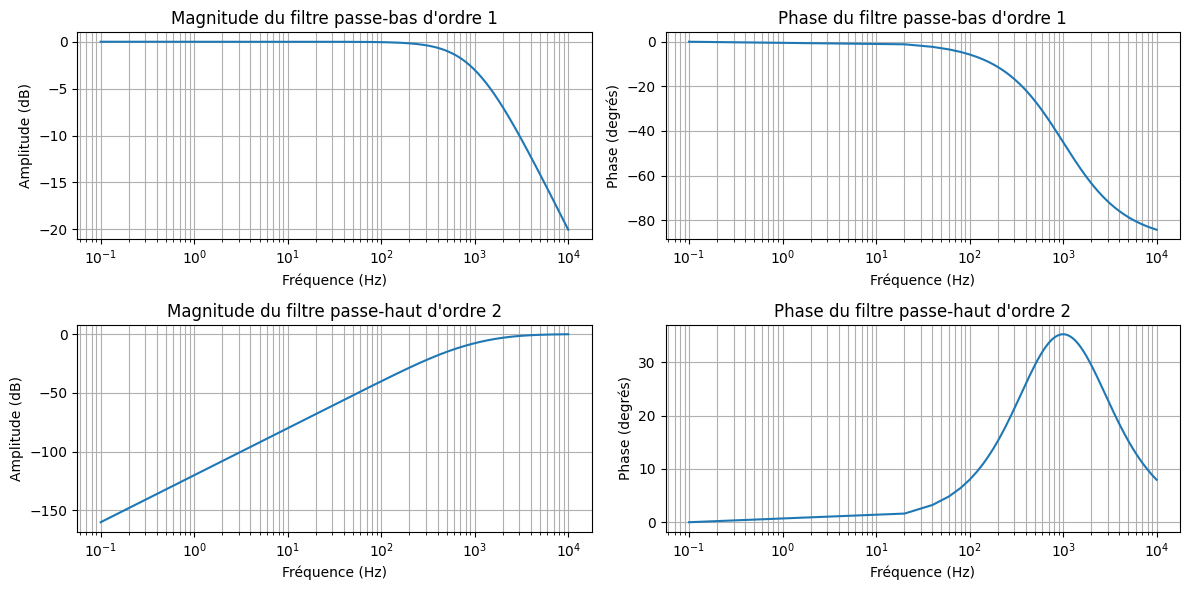

In [8]:
# @title
# Passe-bas
H1 = 1 / (1 + 1j * omega / omega_c)
magnitude_H1 = np.abs(H1)
phase_H1 = np.angle(H1)

# Passe-haut
H2 = omega**2 / (omega**2 - 1j*np.sqrt(2)*omega*omega_c + omega_c**2)
magnitude_H2 = np.abs(H2)
phase_H2 = np.angle(H2)

# Affichage
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.semilogx(frequencies, 20 * np.log10(magnitude_H1))
plt.title('Magnitude du filtre passe-bas d\'ordre 1')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True, which="both")

plt.subplot(2, 2, 2)
plt.semilogx(frequencies, np.degrees(phase_H1))
plt.title('Phase du filtre passe-bas d\'ordre 1')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Phase (degrés)')
plt.grid(True, which="both")

plt.subplot(2, 2, 3)
plt.semilogx(frequencies, 20 * np.log10(magnitude_H2))
plt.title('Magnitude du filtre passe-haut d\'ordre 2')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True, which="both")

plt.subplot(2, 2, 4)
plt.semilogx(frequencies, np.degrees(phase_H2))
plt.title('Phase du filtre passe-haut d\'ordre 2')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Phase (degrés)')
plt.grid(True, which="both")

plt.tight_layout()
plt.show()

$\color{orange}{\text{g) [Analyse écrite]}}$ Comment la phase de la réponse en fréquence affecte-t-elle un signal d'entrée ? Comment cela pourrait-il influencer l'interprétation d'un signal en sortie de filtre dans une application réelle, comme une transmission de données?


<details>
  <summary>Cliquer pour afficher la solution</summary>
  
  La phase de la réponse en fréquence d'un filtre détermine comment les différentes composantes fréquentielles d'un signal d'entrée seront déphasées lorsqu'elles passeront à travers le filtre. Si la phase n'est pas linéaire, certaines fréquences sont décalées davantage que d'autres, ce qui peut entraîner des distorsions temporelles dans le signal filtré. Dans le contexte d'une transmission de données, cela pourrait signifier une dégradation du signal, ce qui pourrait rendre la récupération des données originelles difficile voire impossible.

</details>

Pour aller plus loin dans l'analyse, considérons un filtre passe-bas d'ordre 3 décrit par la fonction de transfert suivante :

$$ H_3(j\omega) = \frac{1}{\left(1 + \frac{j\omega}{\omega_c}\right)^3}. $$

$\color{orange}{\text{h) [Code]}}$ Utiliser `sympy` pour obtenir une expression analytique de la magnitude et de la phase de la réponse en fréquence pour ce filtre d'ordre 3. Évaluer et tracer la magnitude et la phase de la réponse en fréquence pour ce filtre sur la même plage de fréquences que les filtres précédents, en utilisant `numpy` et `matplotlib`.

In [9]:
# @title
omega, omega_c = sp.symbols('omega omega_c', real=True, positive=True)
j = sp.I

H1 = 1 / (1 + j*omega/omega_c)
magnitude_H1 = sp.Abs(H1)
phase_H1 = sp.arg(H1)

H3 = 1 / (1 + j*omega/omega_c)**3
magnitude_H3 = sp.Abs(H3)
phase_H3 = sp.arg(H3)

print("Passe-bas d'ordre 1 (H1):")
print("Magnitude:", magnitude_H1)
print("Phase:", phase_H1)

print("\nPasse-bas d'ordre 3 (H3):")
print("Magnitude:", magnitude_H3)
print("Phase:", phase_H3)

Passe-bas d'ordre 1 (H1):
Magnitude: sqrt(-1/(-omega**2/omega_c**2 - 1))
Phase: arg(1/(I*omega/omega_c + 1))

Passe-bas d'ordre 3 (H3):
Magnitude: sqrt(-1/((I*omega/omega_c - 1)**3*(I*omega/omega_c + 1)**3))
Phase: arg((I*omega/omega_c + 1)**(-3))


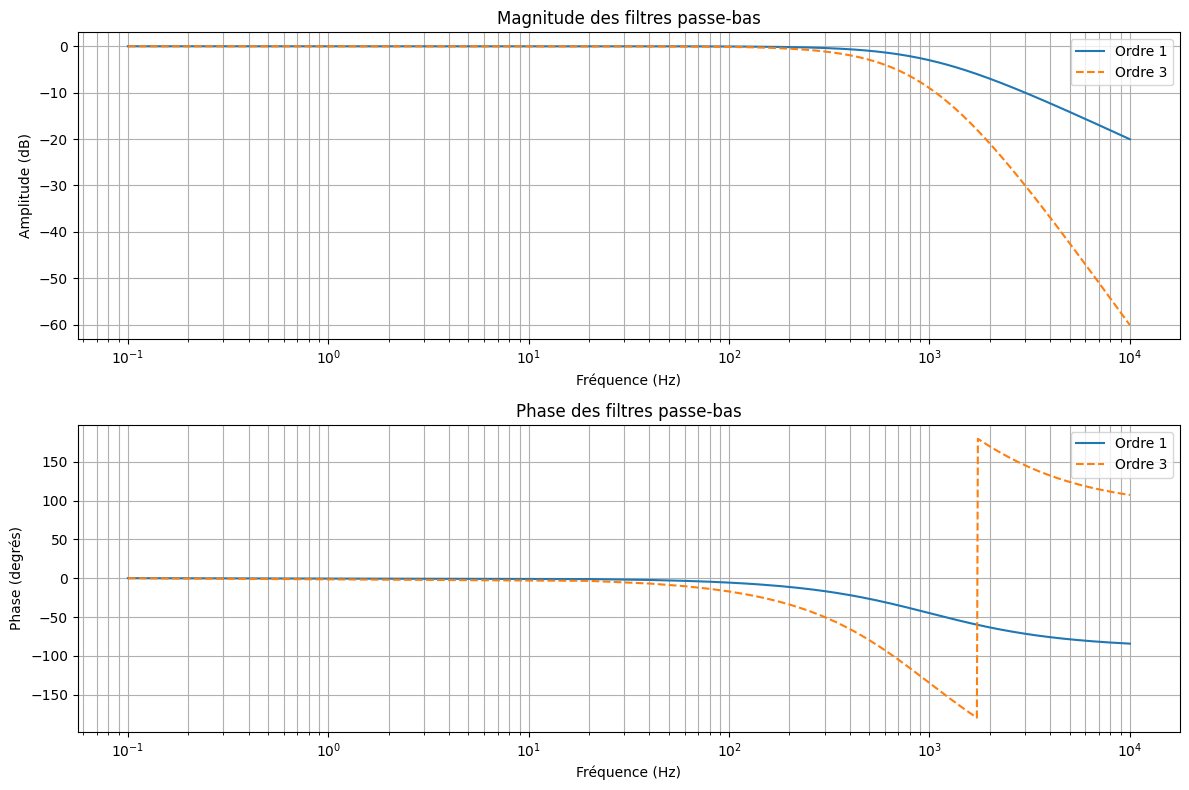

In [10]:
# @title
omega_c = 2 * np.pi * 1000
frequencies = np.linspace(0.1, 10000, 500)
omega = 2 * np.pi * frequencies


H1 = 1 / (1 + 1j * omega / omega_c)
magnitude_H1 = np.abs(H1)
phase_H1 = np.angle(H1)


H3 = 1 / (1 + 1j * omega / omega_c)**3
magnitude_H3 = np.abs(H3)
phase_H3 = np.angle(H3)

# Affichage
plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.semilogx(frequencies, 20 * np.log10(magnitude_H1), label="Ordre 1")
plt.semilogx(frequencies, 20 * np.log10(magnitude_H3), label="Ordre 3", linestyle='--')
plt.title('Magnitude des filtres passe-bas')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend()
plt.grid(True, which="both")


plt.subplot(2, 1, 2)
plt.semilogx(frequencies, np.degrees(phase_H1), label="Ordre 1")
plt.semilogx(frequencies, np.degrees(phase_H3), label="Ordre 3", linestyle='--')
plt.title('Phase des filtres passe-bas')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Phase (degrés)')
plt.legend()
plt.grid(True, which="both")

plt.tight_layout()
plt.show()


$\color{orange}{\text{i) [Analyse écrite]}}$ Comparer graphiquement la réponse en fréquence de ce filtre d'ordre 3 avec celle du filtre d'ordre 1 précédemment étudié. En déduire des observations à partir de la pente de transition et de la réponse de phase.

<details>
  <summary>Cliquer pour afficher la solution</summary>
  
  En comparant graphiquement les réponses en fréquence des filtres d'ordre 1 et 3, plusieurs différences notables peuvent être identifiées :

  Pente de transition :
  Le filtre d'ordre 1 montre une pente de transition d'environ -20 dB/décade après la fréquence de coupure. Cette pente est caractéristique des filtres passe-bas d'ordre 1.
  Le filtre d'ordre 3, quant à lui, présente une pente d'environ -50 dB/décade après la fréquence de coupure. Cette atténuation plus prononcée permet de rejeter plus rapidement les fréquences indésirables, rendant ainsi le filtre d'ordre 3 plus sélectif par rapport au filtre d'ordre 1.
  Réponse de phase :
  Le filtre d'ordre 1 présente une variation de phase linéaire autour de la fréquence de coupure, avec une transition maximale de -90°, ce qui est typique pour un filtre passe-bas d'ordre 1.
  Le filtre d'ordre 3 a une transition de phase plus marquée, soit environ -270°.

  Conclusion :
  Le filtre d'ordre 3 offre une meilleure sélectivité grâce à sa pente de transition plus abrupte. Toutefois, cette performance accrue est accompagnée d'une distorsion de phase plus importante. Le choix entre ces filtres dépendra donc des besoins spécifiques de l'application : sélectivité accrue ou minimisation de la distorsion de phase.

</details>




## $\color{#03fc9d}{\textbf{Exercice 1, évalué en classe (10pt/20):}}$

**Objectif : Dans cette section, nous exploiterons les bibliothèques `Python` comme `numpy`, `matplotlib` et `scipy` pour générer, visualiser et analyser les signaux *chirp*. Nous découvrirons également comment ces signaux peuvent être efficacement utilisés pour caractériser un système inconnu.**

# <font color='green'> Analyse fréquentielle des signaux </font>

$\color{orange}{\text{a) [Démarche manuscrite]}}$ Considérer d'abord un *chirp* exponentiel défini comme suit:

$$
x(t) = \text{cos}(2\pi \mathrm{e}^t)
$$

En but de valider vos résultats, vous décidez de calculer analytiquement le spectre de ce signal. Cependant, vous trouvez cette forme difficile à intégrer. Vous décidez alors d'utiliser un développement en série de Taylor pour approximer le terme $\mathrm{e}^t$ et de simplifier la démarche.

$$
\mathrm{e}^t = \sum_{n=0}^\infty{\frac{t^n}{n!}}
$$

Déterminer analytiquement X(f) en substituant $\mathrm{e}^t$ par les trois premiers termes de son développement en série de Taylor. $\color{red}{\textbf{(3pt/20)}}$

*Notes*:
1. La complétion du carré pourrait vous être utile.
2. L'identité suivante pourrait vous être utile:

    $$
    \int_{-\infty}^{+\infty} \text{e}^{\pm j 2\pi x^2} \mathrm{d} x= \frac{1}{2}(1\pm j).
    $$


---

---


*Insérer une photo de vos démarches pour (a) (papier, $\LaTeX$ ou tablette)*.



---

---


$\color{orange}{\text{b) [code]}}$ Générer sur 10s le signal $x(t)$ défini à la question précédente et son approximation. Utiliser la fonction `fft` de `numpy` ou `scipy` pour obtenir la transformée de Fourier de ces deux signaux. Afficher sur une même figure le spectre en amplitude pour chaque signal à l'aide de `matplotlib` sur une plage de fréquences de 0 Hz à 20 Hz. Commenter sur les différences et sur la qualité de l'approximation. $\color{red}{\textbf{(1pt/20)}}$

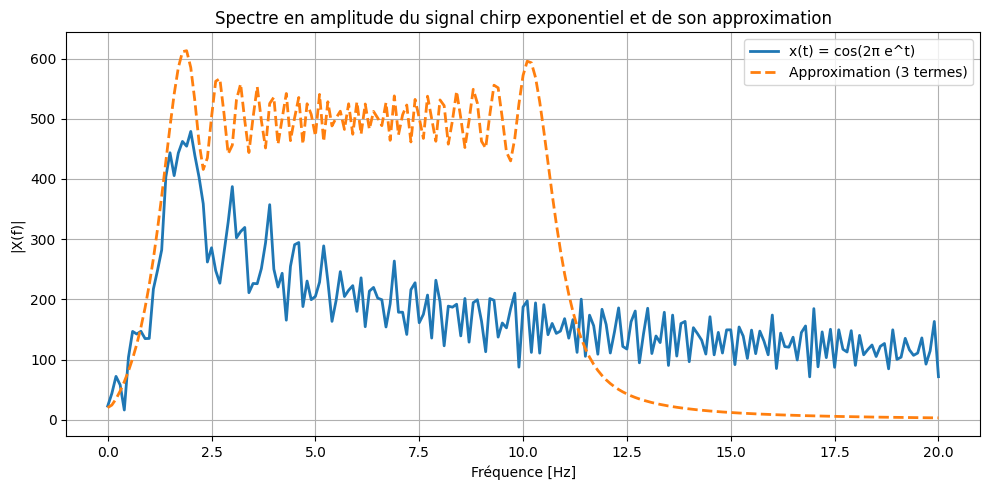

In [2]:
# Écrire votre code ici pour (b)
# ------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# Paramètres du signal
fs = 1000        # fréquence d'échantillonnage [Hz]
T = 10           # durée [s]
t = np.linspace(0, T, int(T*fs), endpoint=False)

# === 1. Signal chirp exponentiel exact ===
x_exact = np.cos(2 * np.pi * np.exp(t))

# === 2. Approximation de Taylor (3 premiers termes de e^t) ===
e_t_approx = 1 + t + t**2 / 2
x_approx = np.cos(2 * np.pi * e_t_approx)

# === 3. Calcul FFT ===
N = len(t)
X_exact = fft(x_exact)
X_approx = fft(x_approx)
freqs = fftfreq(N, 1/fs)

# On ne garde que les fréquences positives (0 à 20 Hz)
mask = (freqs >= 0) & (freqs <= 20)

# === 4. Tracé ===
plt.figure(figsize=(10, 5))
plt.plot(freqs[mask], np.abs(X_exact[mask]), label="x(t) = cos(2π e^t)", lw=2)
plt.plot(freqs[mask], np.abs(X_approx[mask]), '--', label="Approximation (3 termes)", lw=2)
plt.title("Spectre en amplitude du signal chirp exponentiel et de son approximation")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("|X(f)|")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


$\color{orange}{\text{c) [code]}}$ Utiliser la fonction `fft` de `numpy` ou `scipy` pour obtenir la transformée de Fourier du signal *chirp exponentiel* et du signal non-*chirp* (sinus) générés à l'Exercice 0. Afficher le spectre en amplitude pour chaque signal à l'aide de `matplotlib` sur une plage de fréquences de 0 Hz à 3 kHz. $\color{red}{\textbf{(1pt/20)}}$

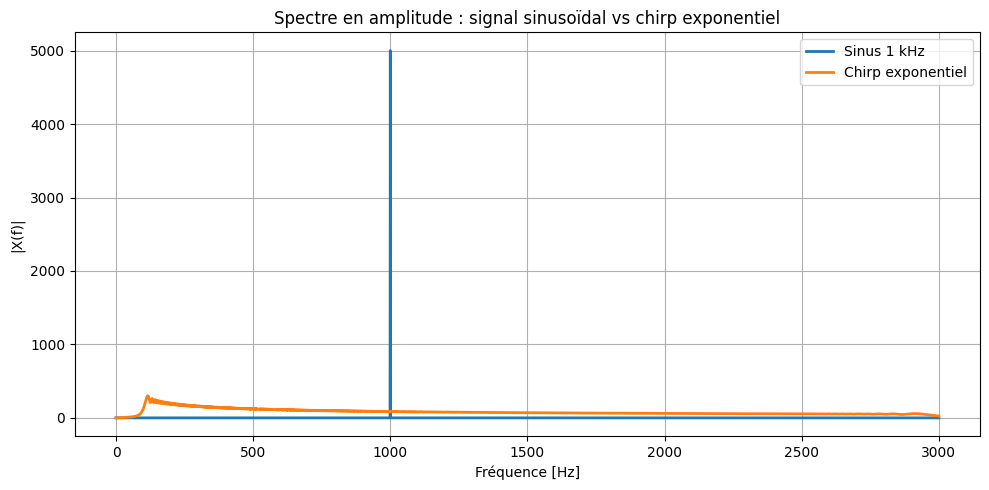

In [3]:
# Écrire votre code ici pour (c)


# === Paramètres généraux ===
fs = 10000          # fréquence d'échantillonnage [Hz]
T = 1               # durée du signal [s]
t = np.linspace(0, T, int(fs*T), endpoint=False)

# === 1. Signal non-chirp : sinus simple ===
f0 = 1000           # fréquence fixe du sinus (1 kHz)
x_sin = np.cos(2 * np.pi * f0 * t)

# === 2. Signal chirp exponentiel ===
# Fréquence instantanée exponentielle : f(t) = f0 * exp(alpha * t)
f_start = 100       # fréquence initiale
f_end = 3000        # fréquence finale
alpha = np.log(f_end / f_start) / T
# Phase = intégrale de 2π f(t) dt
phi = 2 * np.pi * f_start * (np.exp(alpha * t) - 1) / alpha
x_chirp = np.cos(phi)

# === 3. Transformées de Fourier ===
N = len(t)
X_sin = fft(x_sin)
X_chirp = fft(x_chirp)
freqs = fftfreq(N, 1/fs)

# On ne garde que les fréquences positives de 0 à 3 kHz
mask = (freqs >= 0) & (freqs <= 3000)

# === 4. Tracé des spectres ===
plt.figure(figsize=(10, 5))
plt.plot(freqs[mask], np.abs(X_sin[mask]), label="Sinus 1 kHz", lw=2)
plt.plot(freqs[mask], np.abs(X_chirp[mask]), label="Chirp exponentiel", lw=2)
plt.title("Spectre en amplitude : signal sinusoïdal vs chirp exponentiel")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("|X(f)|")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



 $\color{orange}{\text{d) [Analyse écrite]}}$  Discuter des spectres obtenus pour les deux types de signaux. Comment diffère le spectre du *chirp exponentiel* de celui du sinus?  $\color{red}{\textbf{(1pt/20)}}$

**Écrire votre réponse ici pour d).**

$\color{orange}{\text{e) [code]}}$ Il est possible de déterminer la fréquence instantanée $f(t)$ d'un signal sinusoidal $x(t)$ en utilisant la relation suivante:

\begin{align*}
x(t) &= \cos (\phi(t)) \\
f(t) &= \frac{1}{2\pi} \frac{\mathrm{d}\phi(t)}{\mathrm{d}t}
\end{align*}

Tracer une figure représentant la fréquence instantanée des trois signaux chirp générés à l'Exercice 0 en fonction du temps. $\color{red}{\textbf{(1pt/20)}}$

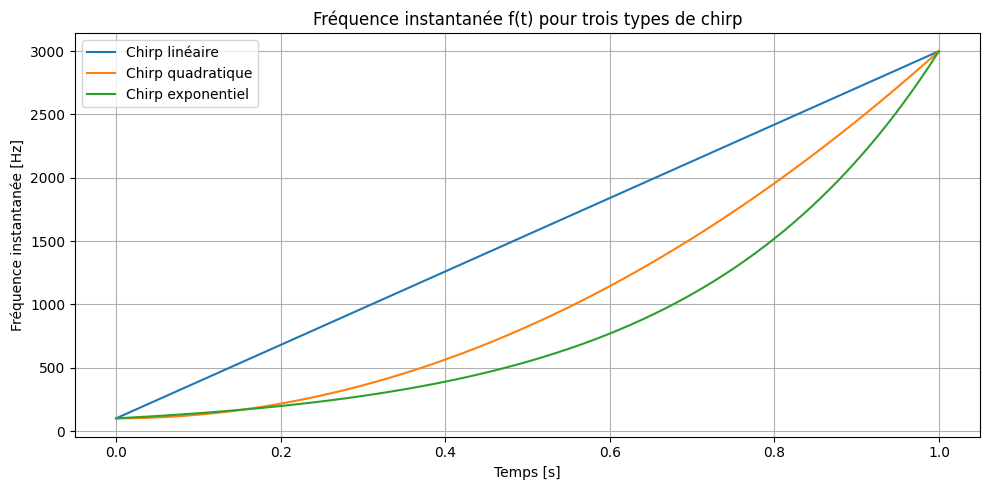

In [4]:
# Écrire vote code ici pour (e)


# === Paramètres généraux ===
fs = 10000          # fréquence d'échantillonnage [Hz]
T = 1               # durée [s]
t = np.linspace(0, T, int(fs*T), endpoint=False)

# === 1. Définition des trois types de chirp ===
f_start = 100       # fréquence initiale [Hz]
f_end = 3000        # fréquence finale [Hz]

# --- a) Chirp linéaire : f(t) = f_start + (f_end - f_start) * t/T
k_lin = (f_end - f_start) / T
phi_lin = 2 * np.pi * (f_start * t + 0.5 * k_lin * t**2)
x_lin = np.cos(phi_lin)

# --- b) Chirp quadratique : f(t) = f_start + (f_end - f_start) * (t/T)^2
k_quad = (f_end - f_start)
phi_quad = 2 * np.pi * (f_start * t + (k_quad/3) * (t**3 / T**2))
x_quad = np.cos(phi_quad)

# --- c) Chirp exponentiel : f(t) = f_start * exp(alpha * t)
alpha = np.log(f_end / f_start) / T
phi_exp = 2 * np.pi * f_start * (np.exp(alpha * t) - 1) / alpha
x_exp = np.cos(phi_exp)

# === 2. Calcul de la fréquence instantanée f(t) = (1 / 2π) * dφ/dt ===
# (On dérive numériquement la phase)
f_lin_inst = (1 / (2 * np.pi)) * np.gradient(phi_lin, 1/fs)
f_quad_inst = (1 / (2 * np.pi)) * np.gradient(phi_quad, 1/fs)
f_exp_inst = (1 / (2 * np.pi)) * np.gradient(phi_exp, 1/fs)

# === 3. Tracé des fréquences instantanées ===
plt.figure(figsize=(10, 5))
plt.plot(t, f_lin_inst, label="Chirp linéaire")
plt.plot(t, f_quad_inst, label="Chirp quadratique")
plt.plot(t, f_exp_inst, label="Chirp exponentiel")
plt.title("Fréquence instantanée f(t) pour trois types de chirp")
plt.xlabel("Temps [s]")
plt.ylabel("Fréquence instantanée [Hz]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# <font color='green'> Identification d'un système inconnu </font>

In [ ]:
from google.colab import files

S'assurer d'avoir téléchargé le fichier 'blackbox_tp3.so' avant l'étape suivante. Le sélectionner en appuyant sur Choose Files.

In [ ]:
uploaded = files.upload()

Vérifier que le fichier a bien été téléchargé dans l'environnement actuel. Si jamais vous voulez retirer un fichier, utiliser

In [ ]:
!ls -lh
#!rm blackbox_tp3.so  #Commande pour retirer un fichier, si nécessaire. Laisser en commentaire.

In [11]:
#import sys
#sys.path.append('blackbox_tp3.so')
import blackbox_tp3

ImportError: dlopen(/Users/simon/Documents/git poly mtl/ELE2700/labo3/blackbox_tp3.so, 0x0002): tried: '/Users/simon/Documents/git poly mtl/ELE2700/labo3/blackbox_tp3.so' (slice is not valid mach-o file), '/System/Volumes/Preboot/Cryptexes/OS/Users/simon/Documents/git poly mtl/ELE2700/labo3/blackbox_tp3.so' (no such file), '/Users/simon/Documents/git poly mtl/ELE2700/labo3/blackbox_tp3.so' (slice is not valid mach-o file)

Le fichier `blackbox_tp3` contient l'exécutable de la fonction boîte noire `blackbox1`, dont nous cherchons à déterminer l'identité. La fonction accepte les arguments suivants:


*   Argument 1: signal d'entrée
*   Argument 2: fréquence d'échantillonage (*fs*)

Elle retourne le signal modifié.
Voici un exemple d'utilisation:

In [ ]:
# output_signal = blackbox_tp3.blackbox1(input_signal, fs)

In [ ]:
# Écrire votre code ici pour (f)

import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import blackbox_tp3   # Fichier fourni contenant la fonction blackbox1

# === 1. Paramètres du signal ===
fs = 10000           # fréquence d'échantillonnage [Hz]
T = 1                # durée du signal [s]
t = np.linspace(0, T, int(fs*T), endpoint=False)

# === 2. Génération des signaux d'entrée ===
# --- (a) Signal sinusoïdal (non-chirp)
f0 = 1000  # 1 kHz
x_sin = np.cos(2 * np.pi * f0 * t)

# --- (b) Signal chirp exponentiel
f_start = 100       # fréquence initiale [Hz]
f_end = 3000        # fréquence finale [Hz]
alpha = np.log(f_end / f_start) / T
phi = 2 * np.pi * f_start * (np.exp(alpha * t) - 1) / alpha
x_chirp = np.cos(phi)

# === 3. Passage des signaux dans la boîte noire ===
y_sin = blackbox_tp3.blackbox1(x_sin, fs)
y_chirp = blackbox_tp3.blackbox1(x_chirp, fs)

# === 4. Calcul des transformées de Fourier ===
def compute_fft(x):
    N = len(x)
    X = fft(x)
    freqs = fftfreq(N, 1/fs)
    return freqs, np.abs(X)

freq_sin, X_sin = compute_fft(x_sin)
_, Y_sin = compute_fft(y_sin)
freq_chirp, X_chirp = compute_fft(x_chirp)
_, Y_chirp = compute_fft(y_chirp)

# === 5. Masque de fréquence (0 à 3 kHz) ===
mask = (freq_sin >= 0) & (freq_sin <= 3000)

# === 6. Tracés comparatifs ===
plt.figure(figsize=(12, 5))

# --- Spectres du SINUS ---
plt.subplot(1, 2, 1)
plt.plot(freq_sin[mask], X_sin[mask], label="Entrée : sinus 1 kHz", lw=2)
plt.plot(freq_sin[mask], Y_sin[mask], label="Sortie : blackbox(sinus)", lw=2)
plt.title("Spectre du signal sinusoïdal (entrée vs sortie)")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("|X(f)|")
plt.legend()
plt.grid(True)

# --- Spectres du CHIRP EXPONENTIEL ---
plt.subplot(1, 2, 2)
plt.plot(freq_chirp[mask], X_chirp[mask], label="Entrée : chirp exponentiel", lw=2)
plt.plot(freq_chirp[mask], Y_chirp[mask], label="Sortie : blackbox(chirp)", lw=2)
plt.title("Spectre du signal chirp exponentiel (entrée vs sortie)")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("|X(f)|")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


$\color{orange}{\text{g) [Analyse écrite]}}$ À partir de l'analyse spectrale, déduire les caractéristiques possibles du système (fréquence de coupure, type de filtre si applicable, etc.). Quel signal (*chirp exponentiel* ou sinus) a fourni une meilleure caractérisation du système et pourquoi ? $\color{red}{\textbf{(2pt/20)}}$

**Écrire votre réponse ici pour g).**

## $\color{#03fc9d}{\textbf{Exercice 2, devoir (10pt/20):}}$

**Objectif : Dans cette section, nous découvrirons l'effet du fenêtrage et de la fuite spectrale sur les signaux idéaux.**

# <font color='green'> Introduction au fenêtrage et à la fuite spectrale </font>

Dans le domaine du traitement des signaux, surtout lors de l'utilisation de la transformée de Fourier discrète, le fenêtrage est une pratique courante. Tout signal de durée finie, comme le *chirp* analysé jusqu'à présent, peut être considéré comme un signal infini idéal multiplié par une fenêtre rectangulaire. Cette multiplication par une fenêtre rectangulaire introduit inévitablement une certaine fuite spectrale due aux discontinuités abruptes en début et fin de signal. En effet, une discontinuité soudaine dans le temps se manifeste par une dispersion dans le domaine fréquentiel, ce qui résulte en une fuite spectrale. Ceci provient du principe d'incertitude en analyse des signaux.

La technique de fenêtrage consiste donc à multiplier le signal par une "fenêtre" spécifique, souvent différente de la rectangulaire, et qui diminue plus graduellement vers zéro à ses extrémités. En atténuant le signal de cette manière, on peut réduire les discontinuités artificielles et, par conséquent, contrôler et atténuer le phénomène de fuite spectrale qui engendre sinon l'apparition de fréquences qui n'existent pas réellement dans le signal, rendant difficile l'identification des véritables composantes fréquentielles.

Différents types de fenêtres existent, chacune ayant ses propres caractéristiques et avantages. Celle de Hamming, par exemple, est conçue pour réduire spécifiquement la fuite spectrale tout en conservant une largeur de bande de résolution acceptable. Elle sera utilisée dans le présent exercice.

Nous approfondirons le concept de fenêtrage, son importance en traitement du signal, et les nuances de la fuite spectrale dans le Chapitre 7.

Pour en apprendre plus sur le fenêtrage: https://en.wikipedia.org/wiki/Window_function#A_list_of_window_functions

Pour en apprendre plus sur la fuite spectrale: https://en.wikipedia.org/wiki/Spectral_leakage

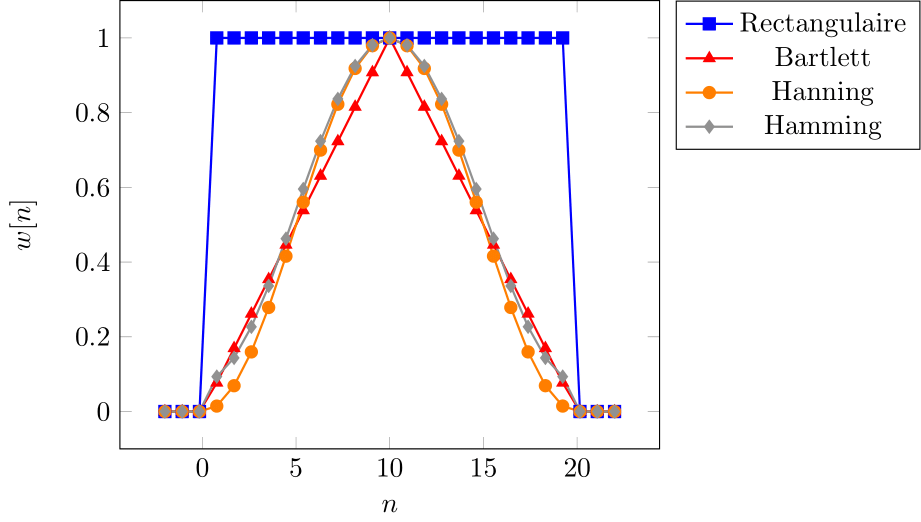


$\color{orange}{\text{a) [code]}}$ Appliquer une fenêtre de Hamming aux signaux *chirp exponentiel* et sinus générés à l'exercice 0 à l'aide de la fonction `numpy.hamming`. Visualiser les signaux dans le domaine temporel avant et après l'application de la fenêtre. $\color{red}{\textbf{(2pt/20)}}$

In [ ]:
# Écrire votre code ici pour (a)

$\color{orange}{\text{b) [code]}}$ Réaliser à nouveau la transformée de Fourier des signaux fenêtrés et visualiser les résultats. $\color{red}{\textbf{(1pt/20)}}$

In [ ]:
# Écrire votre code ici pour (b)

$\color{orange}{\text{c) [code]}}$ Injecter le *chirp exponentiel* fenêtré dans une nouvelle boîte noire, `blackbox_tp3.blackbox2` et en faire l'analyse spectrale.  $\color{red}{\textbf{(2pt/20)}}$

In [ ]:
# Écrire votre code ici pour (c)

$\color{orange}{\text{d) [Analyse écrite]}}$ À partir de l'analyse spectrale, déduire les caractéristiques possibles du système (fréquence de coupure, type de filtre si applicable, etc.). Quel signal (*chirp exponentiel* ou sinus) a fourni une meilleure caractérisation du système et pourquoi ? $\color{red}{\textbf{(2pt/20)}}$

**Écrire votre réponse ici pour d).**

$\color{orange}{\text{e) [Analyse écrite]}}$ Comparer les résultats obtenus avec le signal fenêtré à ceux obtenus avec le signal original. Comment le fenêtrage a-t-il influencé l'analyse spectrale ? $\color{red}{\textbf{(2pt/20)}}$

**Écrire votre réponse ici pour e).**

$\color{orange}{\text{f) [Analyse écrite]}}$ Expliquer mathématiquement le concept d'un signal *chirp* en se basant sur sa définition temporelle:
$$
x(t) = \text{cos}(\omega_0 t + \pi kt^2),
$$
où $\omega_0$ est la fréquence initiale et $k$ est le taux de variation de la fréquence. Indiquer les propriétés uniques des signaux *chirp* ainsi que leur utilité pour caractériser des systèmes inconnus en télécommunications.

$\color{red}{\textbf{(1pt/20)}}$

**Écrire votre réponse ici pour f).**

## $\color{#03fc9d}{\textbf{Précisions pour la remise:}}$

* Pour chaque exercice, répondre en ajoutant des cases de code ou de texte en dessous de la question.

* Remettre sur moodle un fichier `.ipynb` contenant tous les exercises de ce TP avec toutes les librairies et importations nécessaires pour que le code roule sans erreurs. Remettre également un fichier `.pdf` du notebook. (Voir Notes additionnelles du TP-1)

* Indiquer vos noms, vos matricules et votre numéro d'équipe au début dans l'entête du `notebook`.